In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)

# Filter for Data Analyst roles
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [10]:
# Filter for Data Analyst roles
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

# Create month number column
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode skills
df_DA_explode = df_DA.explode('job_skills')

# Pivot table: count skills by month
df_DA_pivot = df_DA_explode.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)

# Sort skills by total count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[
    df_DA_pivot.loc['Total']
    .sort_values(ascending=False)
    .index
]

# 🔑 REMOVE TOTAL ROW BEFORE DATE CONVERSION
df_DA_pivot = df_DA_pivot.drop(index='Total')

# Reset index
df_DA_pivot = df_DA_pivot.reset_index()

# Convert month number → month name
df_DA_pivot['job_posted_month'] = pd.to_datetime(
    df_DA_pivot['job_posted_month_no'],
    format='%m'
).dt.strftime('%b')

# Set month name as index
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')


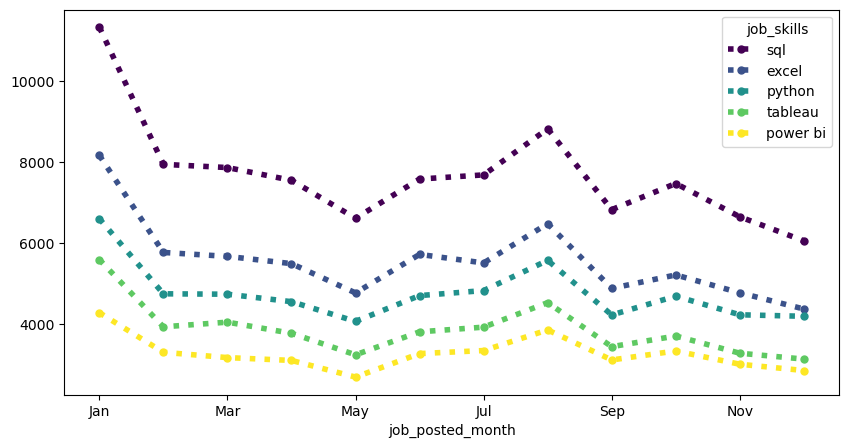

In [11]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':',            # options: '-', '--', '-.', ':'
    colormap='viridis',        # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    markersize=5,
    marker='o',                # options: 'o', 'x', '+', '*', 's', '.', '1', '2', '3', '4'
    figsize=(10, 5)
)

plt.show()


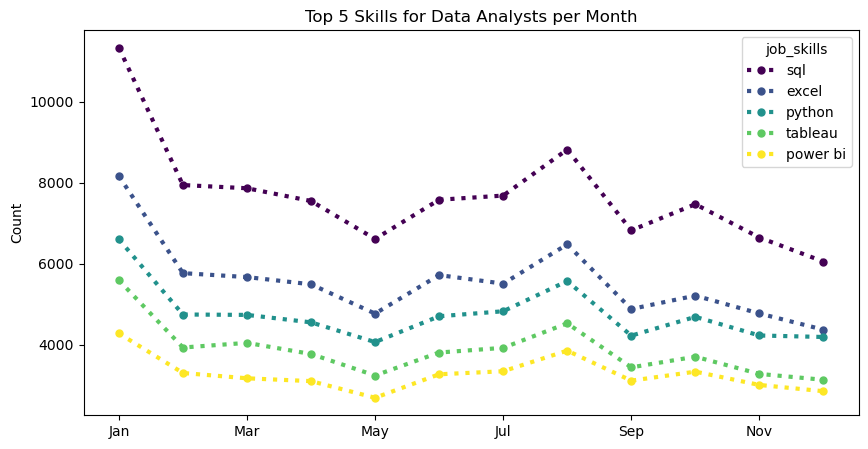

In [20]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=3,
    linestyle= ':',
    colormap= 'viridis',
    marker= 'o',
    markersize=5,
    figsize=(10,5)

)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [23]:
# Explode the job_skills into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate median salary and count of job postings per skill
skill_stats = (
    df_exploded
    .groupby('job_skills').agg(
        median_salary=('salary_year_avg', 'median'),
        skill_count=('job_skills', 'count')
    )
    .dropna()
)

# Limit to top skills by demand
skill_count = 20
skill_stats = (skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.000000,92428
excel,84479.000000,66860
python,98500.000000,57190
tableau,95000.000000,46455
power bi,90000.000000,39380
r,92527.500000,29996
sas,90000.000000,27998
powerpoint,85000.000000,13822
word,80000.000000,13562


In [5]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Basic cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)


In [6]:
# Filter to Data Analyst roles
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

# Explode skills
df_exploded = df_DA.explode('job_skills')



In [7]:
# Explode skills into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate median salary and skill count per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to top skills
skill_count = 20
skill_stats = skill_stats.sort_values(
    by='skill_count',
    ascending=False
).head(skill_count)


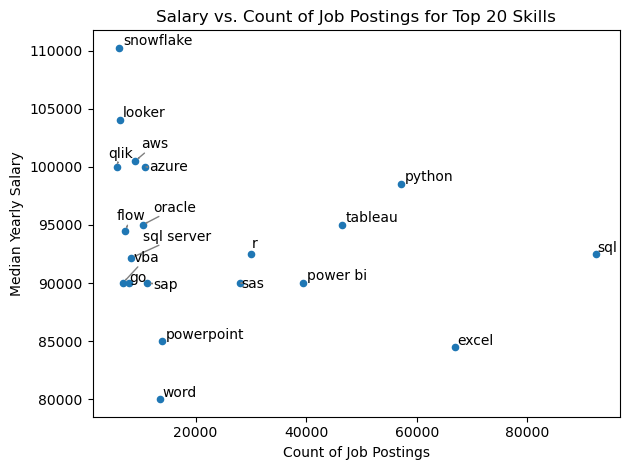

In [11]:
from adjustText import adjust_text

import matplotlib.pyplot as plt

# Scatter plot
skill_stats.plot(
    kind='scatter',
    x='skill_count',
    y='median_salary'
)

# Add text labels for each point
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(
        plt.text(
            skill_stats['skill_count'].iloc[i],
            skill_stats['median_salary'].iloc[i],
            txt
        )
    )

# Adjust text to reduce overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color= 'gray', lw= 1))

# Labels and title
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')

plt.tight_layout()
plt.show()


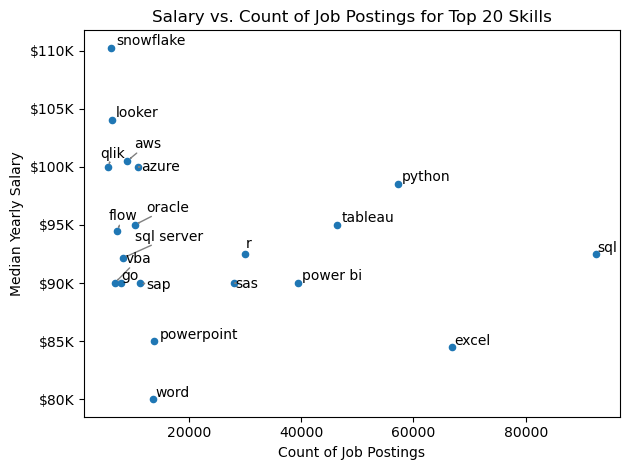

In [17]:

import matplotlib.pyplot as plt

# Scatter plot

# fig, ax = plt.subplots()

skill_stats.plot(
    kind='scatter',
    x='skill_count',
    y='median_salary'
)

# Add text labels for each point
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(
        plt.text(
            skill_stats['skill_count'].iloc[i],
            skill_stats['median_salary'].iloc[i],
            txt
        )
    )

# Adjust text to reduce overlap
adjust_text(texts, arrowprops=dict(arrowstyle="->", color= 'gray',))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Labels and title
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')

plt.tight_layout()
plt.show()


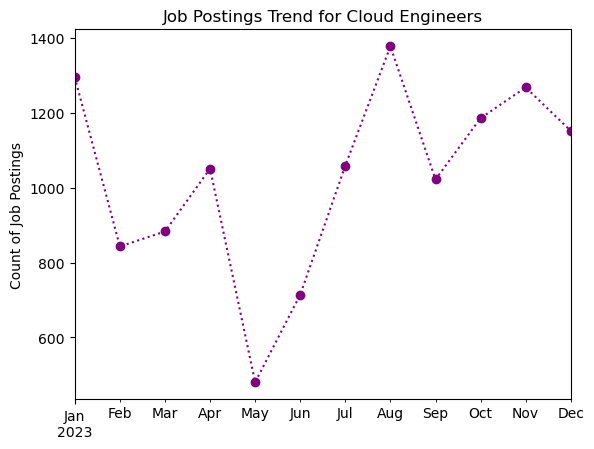

In [18]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
monthly_job_postings = df_ce.groupby('job_posted_month').size()
monthly_job_postings.plot( kind='line',  linestyle=':',  color='purple',  marker='o' )
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

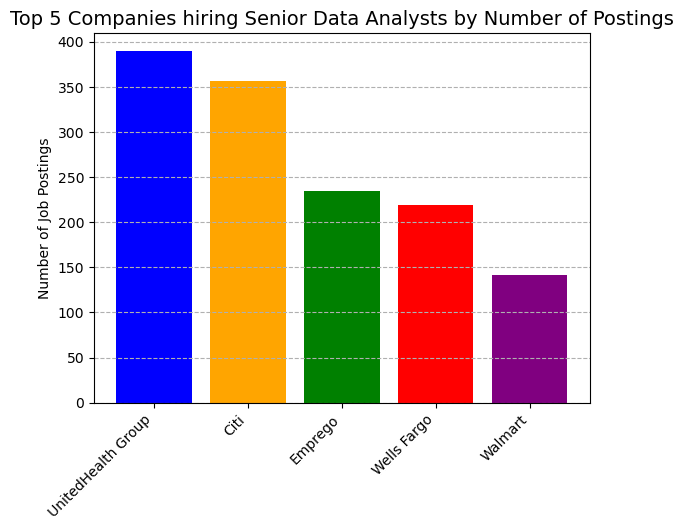

In [19]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Filter for Senior Data Analyst roles
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

# Get the top 5 companies by number of postings
location_counts = SDA_df['company_name'].value_counts().head(5)

# Custom colors
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot the bar chart
plt.bar(location_counts.index, location_counts.values, color=colors)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()